# Spam Detection Analysis

In this Jupyter notebook, we will perform a spam detection analysis on a dataset containing SMS messages labeled as spam or not spam. The dataset contains four columns, but we will only use the columns v1 (label: spam or not spam) and v2 (the SMS message).

## Dataset

The dataset we will be using is the [SMS Spam Collection](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/code?resource=download), which contains 5,574 SMS messages labeled as spam or not spam. The dataset can be downloaded from the UCI Machine Learning Repository.

In [9]:
import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')


print("Columns in the dataset:", df.columns.tolist())

print("\nShape of the dataset:", df.shape)


Columns in the dataset: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Shape of the dataset: (5572, 5)


## Data Cleaning
1. Understanding the columns

We have 5 columns in this dataset where three of them seem to have only nan

In [10]:
display(df.head(5))

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


But in the columns with nans also have lines with values, let's investigate it

In [11]:
print('Count of nan values:\n', df.isna().sum())

Count of nan values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


Showing the values in the nan columns

In [12]:
print('\nNot nans in the Unnamed: 2')
display(df[~df['Unnamed: 2'].isna()].head(5))

print('\nNot nans in the Unnamed: 3')
display(df[~df['Unnamed: 3'].isna()].head(5))

print('\nNot nans in the Unnamed: 4')
display(df[~df['Unnamed: 4'].isna()].head(5))


Not nans in the Unnamed: 2


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN



Not nans in the Unnamed: 3


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN



Not nans in the Unnamed: 4


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


The first impression is that some of the text appears to have been broken into columns. Let's see a sample

In [13]:
full_message_281 = df.loc[[281]]
full_message_281['full_message_281'] = full_message_281['v2']+full_message_281['Unnamed: 2']+full_message_281['Unnamed: 3']+full_message_281['Unnamed: 4']
print(full_message_281.iloc[0,5])

\Wen u miss someone the person is definitely special for u..... But if the person is so special why to miss them just Keep-in-touch\" gdeve.."


As we can see the unnamed column contains values ​​that can be joined to v2 to complete the sentences. Let's join it

In [14]:
# Concatenate the strings in the v2 column with the non-null values in the Unnamed columns
df['concated_sentence'] = df['v2'].fillna('') + df['Unnamed: 2'].fillna('') + df['Unnamed: 3'].fillna('') + df['Unnamed: 4'].fillna('')

Now we can use only the columns that is important to us, and rename them

In [15]:
df = df[['concated_sentence', 'v1']]
df.columns = ['sentences','target']

2. Cleaning the sentences and understanding the data

First let's investigate the distribuition of our data

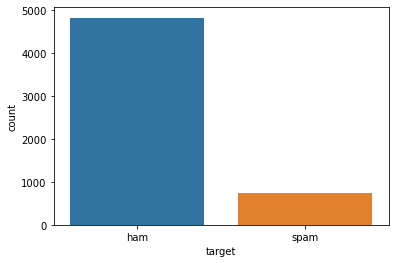

In [16]:
import seaborn as sns

sns.countplot(x='target', data=df);

We have more ham messages than spam messages, it's a bad signal, because our dataset is unbalanced and it can prejudice some analysis and machine learning models.

In [17]:
print('Total duplicated:', df.duplicated().sum())

print('Total spam duplicated:', df[df['target']=='spam'].duplicated().sum())

print('Total ham duplicated:', df[df['target']=='ham'].duplicated().sum())

Total duplicated: 403
Total spam duplicated: 94
Total ham duplicated: 309


And also we have some duplicated data, that decrease even more our spam target, let's remove it

In [18]:
df = df.drop_duplicates()

Now let's clean up our texts, standardizing them, removing abbreviations and putting everything in lowercase

In [19]:
df['sentences'] = df['sentences'].str.lower()

In [20]:
import re

def expand_contractions(text):
    # Define a dictionary of contractions and their expansions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'd": "who would",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    
    # Create a regular expression pattern to match the contractions
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    
    # Replace the contractions with their expansions
    expanded_text = pattern.sub(lambda match: contractions[match.group(0)], text)
    
    return expanded_text

In [21]:
df['sentences'] = df['sentences'].apply(expand_contractions)

3. Now let's create the dataset for our EDA ideas and machine learning

For our machine learning model and some analysis we will need the dataframe balanced, so here we will use resample to balance our dataset based in the minority target

In [22]:
from sklearn.utils import resample

majority_df = df[df['target'] == 'ham']
minority_df = df[df['target'] == 'spam']

# Determine the size of the minority class
minority_size = len(minority_df)

# Undersample the majority class to the size of the minority class
undersampled_majority_df = resample(majority_df, replace=False, n_samples=minority_size, random_state=42)

# Combine the minority and undersampled majority classes
balanced_df = pd.concat([minority_df, undersampled_majority_df])

# Shuffle the rows of the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=5).reset_index(drop=True)

## Exploratory Data Analysis

* The lenght of the message is important to classify the sentence ?
* The punctuations is important ?
* Which words that appear most in each type of message 
* N-grams

1. Let's identify if the size of the message represent something in the target

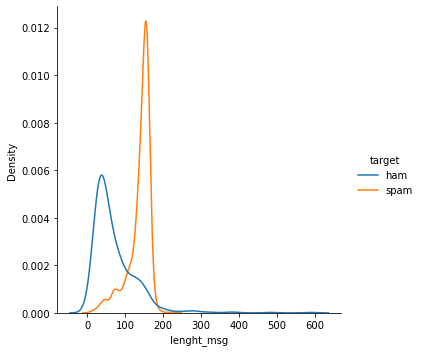

In [23]:
balanced_df['lenght_msg'] = balanced_df['sentences'].apply(lambda x: len(x))
sns.displot(x='lenght_msg', data=balanced_df, hue='target', kind='kde');

Here we can see a visual difference between the length text for both of target. Let's do some stats to confirm that it's not only visual.

In [24]:
balanced_df.groupby('target').describe()

lenght_msg                                                         
            count        mean        std   min    25%    50%    75%    max
target                                                                    
ham         653.0   71.323124  58.115403   2.0   33.0   52.0   92.0  588.0
spam        653.0  138.245023  29.922774  13.0  132.0  149.0  157.0  224.0

In [25]:
from scipy import stats

# create separate DataFrames for ham and spam messages
ham_df = balanced_df[balanced_df['target'] == 'ham']
spam_df = balanced_df[balanced_df['target'] == 'spam']

# perform a two-sample t-test
t, p = stats.ttest_ind(ham_df['lenght_msg'], spam_df['lenght_msg'], equal_var=False)

# print the results
print('t-value: ', t)
print('p-value: ', p)


t-value:  -26.161941219088025
p-value:  1.0153616508177945e-114


Our hypothesis is that spam sentences have longer texts and based on our <b>p-value 1^-114</b>, so we can reject our null hypothesis.

2. Let's understanding about punctuations in spam sentences vs ham sentences

In [26]:
import string

# Declaring the variable with all punctuations
punctuations = string.punctuation

# Initialize counts for each punctuation mark
spam_counts = {p: 0 for p in punctuations}
ham_counts = {p: 0 for p in punctuations}

# Loop over each message in the DataFrame
for idx, row in balanced_df.iterrows():
    message = row['sentences']
    target = row['target']
    
    # Count the punctuation marks in the message
    for p in punctuations:
        count = message.count(p)
        
        # Add the count to the appropriate dictionary based on the target
        if target == 'spam':
            spam_counts[p] += count
        else:
            ham_counts[p] += count

# Creating a dataframes with the results for ham and spam
ham_punct_df = pd.DataFrame.from_dict(ham_counts, orient='index', columns=['ham_count'])
spam_punct_df = pd.DataFrame.from_dict(spam_counts, orient='index', columns=['spam_count'])

# Joining the dataframes
punct_df = ham_punct_df.join(spam_punct_df, how='outer')

# Sorting values
punct_df = punct_df.sort_values(by=['ham_count', 'spam_count'], ascending=False).reset_index()

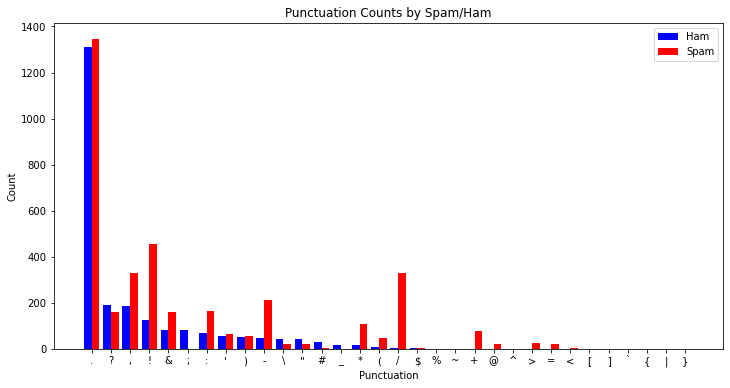

In [27]:
import matplotlib.pyplot as plt

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
p1 = ax.bar(punct_df.index - bar_width/2, punct_df['ham_count'], bar_width, color='blue', label='Ham')
p2 = ax.bar(punct_df.index + bar_width/2, punct_df['spam_count'], bar_width, color='red', label='Spam')

# Add labels, title, and legend
ax.set_xlabel('Punctuation')
ax.set_ylabel('Count')
ax.set_title('Punctuation Counts by Spam/Ham')
ax.set_xticks(punct_df.index)
ax.set_xticklabels(punct_df['index'])
ax.legend()

plt.show()

In this visualization we can see that some punctuations are more used in spam message, let's see it in a different way

In [28]:
punct_df['difference_punctuation'] = punct_df['spam_count']-punct_df['ham_count']
punct_df = punct_df.sort_values(by='difference_punctuation', ascending=False)
punct_df.head(5)

,index,ham_count,spam_count,difference_punctuation
3,!,129,456,327
16,/,7,332,325
9,-,49,212,163
2,",",187,330,143
6,:,70,164,94


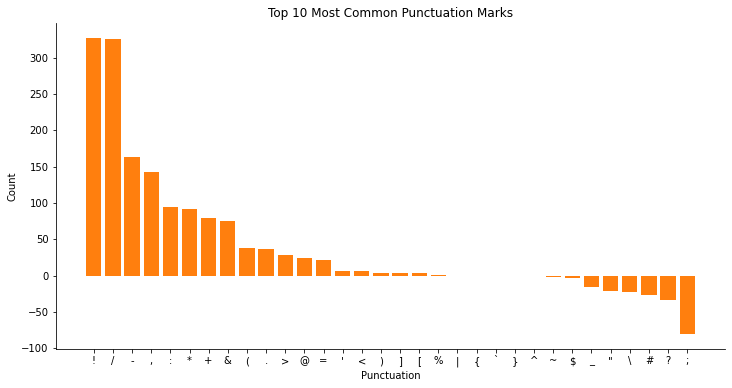

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(punct_df['index'], punct_df['difference_punctuation'], color=['#ff7f0e'])
ax.set_xlabel('Punctuation')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Common Punctuation Marks')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


The <b>!</b> and <b>/</b> appears so many times more in spam sentences than ham sentences. Let's see in which kind of sentences it appears

In [30]:
spam_msgs = balanced_df[balanced_df['target']=='spam']
spam_msgs[spam_msgs['sentences'].str.contains('!')].tail(5)['sentences'].values

array(['want explicit sex in 30 secs? ring 02073162414 now! costs 20p/min',
       'urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18',
       'ringtone club: get the uk singles chart on your mobile each week and choose any top quality ringtone! this message is free of charge.',
       'you 07801543489 are guaranteed the latests nokia phone, a 40gb ipod mp3 player or a å£500 prize! txt word:collect to no:83355! tc-llc ny-usa 150p/mt msgrcvd18+',
       '09066362231 urgent! your mobile no 07xxxxxxxxx won a å£2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach you! call 09066362231 asap!'],
      dtype=object)

! associated a imperative messages, like "urgent!" "asap!"

In [31]:
spam_msgs[spam_msgs['sentences'].str.contains('/')].tail(5)['sentences'].values

array(['you 07801543489 are guaranteed the latests nokia phone, a 40gb ipod mp3 player or a å£500 prize! txt word:collect to no:83355! tc-llc ny-usa 150p/mt msgrcvd18+',
       '09066362231 urgent! your mobile no 07xxxxxxxxx won a å£2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach you! call 09066362231 asap!',
       'if you do not, your prize will go to another customer. t&c at www.t-c.biz 18+ 150p/min polo ltd suite 373 london w1j 6hl please call back if busy ',
       'your credits have been topped up for http://www.bubbletext.com your renewal pin is tgxxrz',
       'hi its lucy hubby at meetins all day fri & i will b alone at hotel u fancy cumin over? pls leave msg 2day 09099726395 lucy x callså£1/minmobsmorelkpobox177hp51fl'],
      dtype=object)

/ associated a site links or fake prize dates

3. Now let's remove the ponctuation and understand which kind of words that appear most in each type of message m

In [32]:
translator = str.maketrans('', '', string.punctuation)
balanced_df['sentences_without_punc'] = balanced_df['sentences'].apply(lambda x: x.translate(translator))
balanced_df

,sentences,target,lenght_msg,sentences_without_punc
0,it only does simple arithmetic not percentages.,ham,47,it only does simple arithmetic not percentages
1,hard live 121 chat just 60p/min. choose your g...,spam,145,hard live 121 chat just 60pmin choose your gir...
2,sms. ac sun0819 posts hello:\you seem cool wan...,spam,94,sms ac sun0819 posts helloyou seem cool wanted...
3,u are subscribed to the best mobile content se...,spam,132,u are subscribed to the best mobile content se...
4,themob> check out our newest selection of cont...,spam,138,themob check out our newest selection of conte...
...,...,...,...,...
1301,your credits have been topped up for http://ww...,spam,89,your credits have been topped up for httpwwwbu...
1302,hows the champ just leaving glasgow!,ham,36,hows the champ just leaving glasgow
1303,"yes, I am small kid.. and boost is the secret ...",ham,60,yes I am small kid and boost is the secret of ...
1304,hi its lucy hubby at meetins all day fri & i w...,spam,161,hi its lucy hubby at meetins all day fri i wi...


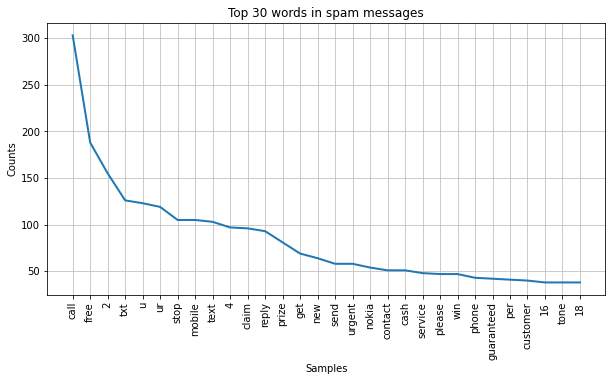

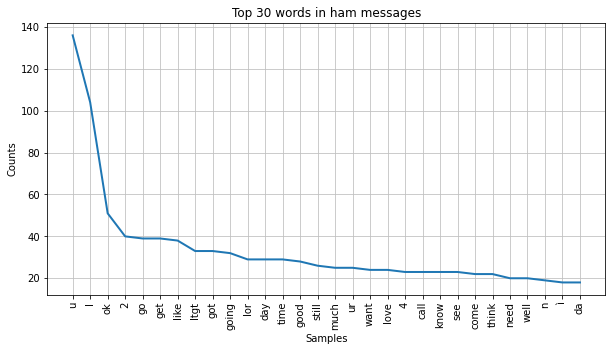

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.corpus import stopwords

balanced_df['tokens'] = balanced_df['sentences_without_punc'].apply(word_tokenize)

# Remove stopwords from the text
stop_words = set(stopwords.words('english'))


fdist_spam = FreqDist([word for tokens in balanced_df[balanced_df['target'] == 'spam']['tokens'] for word in tokens if word not in stop_words])
fdist_ham = FreqDist([word for tokens in balanced_df[balanced_df['target'] == 'ham']['tokens'] for word in tokens if word not in stop_words])

plt.figure(figsize=(10, 5))
fdist_spam.plot(30, cumulative=False, title='Top 30 words in spam messages')
plt.show()

plt.figure(figsize=(10, 5))
fdist_ham.plot(30, cumulative=False, title='Top 30 words in ham messages')
plt.show()

How we can see here in our balanced dataset, the words call, free, urgent appears so many times in spam messages in otherwise normal messages like u, I, ok appears so many times in ham messages. Let's see how the words in the entire dataset works.

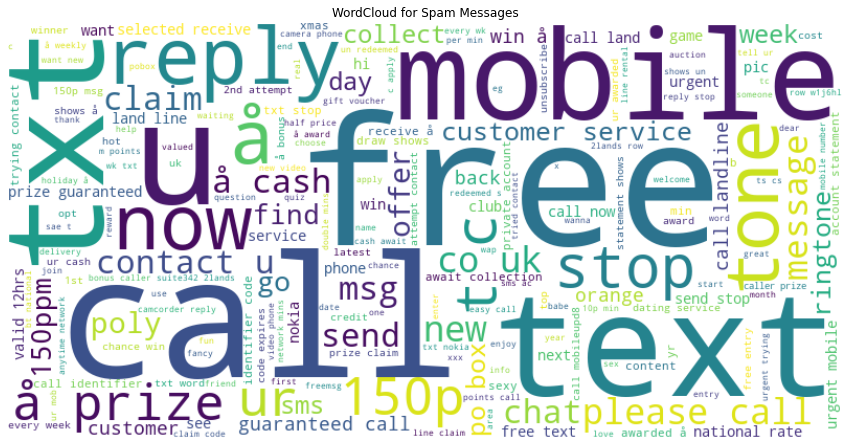

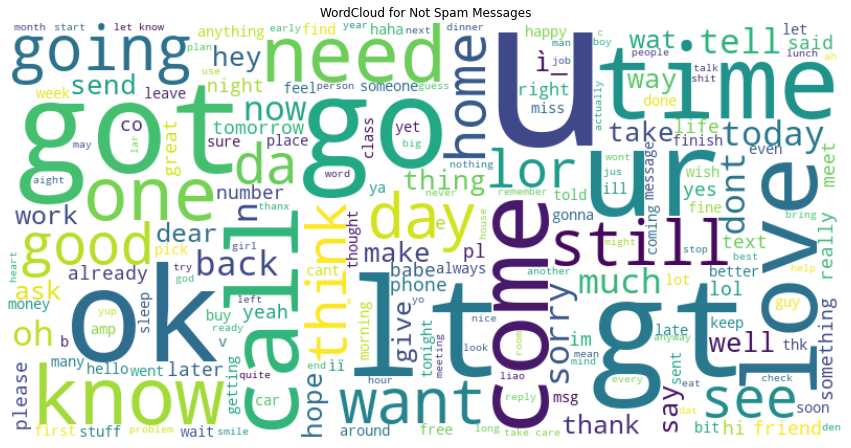

In [34]:
# Split the text into spam and not spam messages
spam_text = ' '.join(df[df['target'] == 'spam']['sentences'])
ham_text = ' '.join(df[df['target'] == 'ham']['sentences'])

# Remove stopwords from the text
stop_words = set(stopwords.words('english'))
spam_text = ' '.join([word for word in spam_text.split() if word.lower() not in stop_words])
ham_text = ' '.join([word for word in ham_text.split() if word.lower() not in stop_words])

# Create a WordCloud object for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Create a WordCloud object for not spam messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plot the WordCloud for spam messages
plt.figure(figsize=(15, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Messages')
plt.show()

# Plot the WordCloud for not spam messages
plt.figure(figsize=(15, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Not Spam Messages')
plt.show()

In the world clouds we can see a big difference between the most common words in the two categories

4. Let's analyze the ngrams in the sentences

* But what's N-grams ? N-grams are contiguous sequences of N elements in a given string or text. Elements are usually words, but they can also be characters or symbols, depending on the context in which they are being used.

* For example Good Morning, how many times morning appears with good in a sentence ? This a example of bi-gram 

In [35]:
from nltk import ngrams
from collections import Counter

In [36]:
tokens = spam_text.split()

n = 2

bigrams = ngrams(tokens, n)

bigram_freq = Counter(bigrams)

print(bigram_freq.most_common(10))

[(('please', 'call'), 39), (('po', 'box'), 22), (('send', 'stop'), 18), (('å£1000', 'cash'), 17), (('prize', 'guaranteed.'), 17), (('guaranteed.', 'call'), 17), (('valid', '12hrs'), 16), (('urgent!', 'mobile'), 16), (('2', 'claim'), 15), (('account', 'statement'), 15)]


"Please call" is the pattern that more appears in bigrams

In [37]:
tokens = spam_text.split()

n = 3

trigrams = ngrams(tokens, n)

trigram_freq = Counter(trigrams)

print(trigram_freq.most_common(10))

[(('prize', 'guaranteed.', 'call'), 17), (('private!', '2003', 'account'), 13), (('2003', 'account', 'statement'), 13), (('reply', 'call', '08000930705'), 12), (('land', 'line.', 'claim'), 12), (('shows', '800', 'un-redeemed'), 12), (('bonus', 'caller', 'prize'), 10), (('urgent!', 'trying', 'contact'), 9), (('800', 'un-redeemed', 's.'), 9), (('un-redeemed', 's.', 'i.'), 9)]


"Prize guaranteed call" is the pattern that more appears in trigams

## Results EDA

* The word <b>call</b> is a word of strong impact for spam messages, malicious people in spam messages always seem to try to convert victims to calls.
* Exclamation <b>"!"</b> marks in spam messages are in some cases trying to convey a sense of urgency so that victims fall for the scams, and commercial e-mails.
* Several spam messages are <b>larger than normal messages</b>, where different phrases are used to try to convince the victim to click on links, or make a call.
* A common type of spam message involving false <b>prizes</b> and <b>rewards</b>

# Creating a ML model

Let's test some models that handle high dimensionality and different vectorization methods well.

In [56]:
from sklearn.metrics import precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords


Let's try Naive Bayes, Random Forest and SVM, let's try with and without stopwords also we will use two types of vectorizers CountVectorizer and TfidfVectorizer

In [57]:
stopwords = set(stopwords.words('english'))

# convert labels to binary (spam = 1, ham = 0)
balanced_df['label'] = balanced_df['target'].map({'ham': 0, 'spam': 1})

# Define a function to train and evaluate a Random Forest model
def train_rf(X, y, use_bow, use_tfidf, remove_stopwords):
    if use_bow:
        vec = CountVectorizer(stop_words=stopwords if remove_stopwords else None)
    elif use_tfidf:
        vec = TfidfVectorizer(stop_words=stopwords if remove_stopwords else None)
    else:
        return None

    X_vec = vec.fit_transform(X)

    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X_vec, y, cv=5)

    return ('Random Forest', use_bow, use_tfidf, remove_stopwords, scores.mean(), scores.std())

# Define a function to train and evaluate an SVM model
def train_svm(X, y, use_bow, use_tfidf, remove_stopwords):
    if use_bow:
        vec = CountVectorizer(stop_words=stopwords if remove_stopwords else None)
    elif use_tfidf:
        vec = TfidfVectorizer(stop_words=stopwords if remove_stopwords else None)
    else:
        return None

    X_vec = vec.fit_transform(X)

    svm = SVC()
    scores = cross_val_score(svm, X_vec, y, cv=5)

    return ('SVM', use_bow, use_tfidf, remove_stopwords, scores.mean(), scores.std())

# Define a function to train and evaluate a Naive Bayes model
def train_nb(X, y, use_bow, use_tfidf, remove_stopwords):
    if use_bow:
        vec = CountVectorizer(stop_words=stopwords if remove_stopwords else None)
    elif use_tfidf:
        vec = TfidfVectorizer(stop_words=stopwords if remove_stopwords else None)
    else:
        return None

    X_vec = vec.fit_transform(X)

    nb = MultinomialNB()
    scores = cross_val_score(nb, X_vec, y, cv=5)

    return ('Naive Bayes', use_bow, use_tfidf, remove_stopwords, scores.mean(), scores.std())

# Define a list of models to train and evaluate
models = [
    train_rf,
    train_svm,
    train_nb,
]

# Define a list of text representation techniques to use
text_reps = [
    (False, False),
    (True, False),
    (False, True),
    (True, True),
]

results = []
for model in models:
    for use_bow, use_tfidf in text_reps:
        for remove_stopwords in [True, False]:
            result = model(balanced_df['sentences'], balanced_df['label'], use_bow, use_tfidf, remove_stopwords)
            if result is not None:
                results.append(result)

Now let's evaluate which are the best models

In [58]:
result = pd.DataFrame(results, columns=['Model', 'Bow', 'TFidf','R_stopwords', 'Mean_Acc', 'Std', ])
result = result.sort_values(by=['Mean_Acc', 'Model'], ascending=False)
result

,Model,Bow,TFidf,R_stopwords,Mean_Acc,Std
13,Naive Bayes,True,False,False,0.955582,0.013855
17,Naive Bayes,True,True,False,0.955582,0.013855
3,Random Forest,False,True,False,0.954052,0.010584
15,Naive Bayes,False,True,False,0.954052,0.016088
2,Random Forest,False,True,True,0.950235,0.015869
5,Random Forest,True,True,False,0.950227,0.013060
9,SVM,False,True,False,0.947913,0.023214
1,Random Forest,True,False,False,0.947164,0.017714
14,Naive Bayes,False,True,True,0.944108,0.014842
12,Naive Bayes,True,False,True,0.943342,0.015578


We were able to observe the following results, all models had above 90% accuracy which is good accuracy, the models without stopwords performed worse than those with stopwords, probably some stopwords have a strong impact on the classification, also the tfidf method had more results positive than the bagofwords method.

Despite the high accuracy, it may not be the best metric for evaluating our model, in this case, we will look for a model that minimizes normal messages in the spam box, but on the other hand, this can increase the amount of spam messages in the inbox, let's accept this trade off

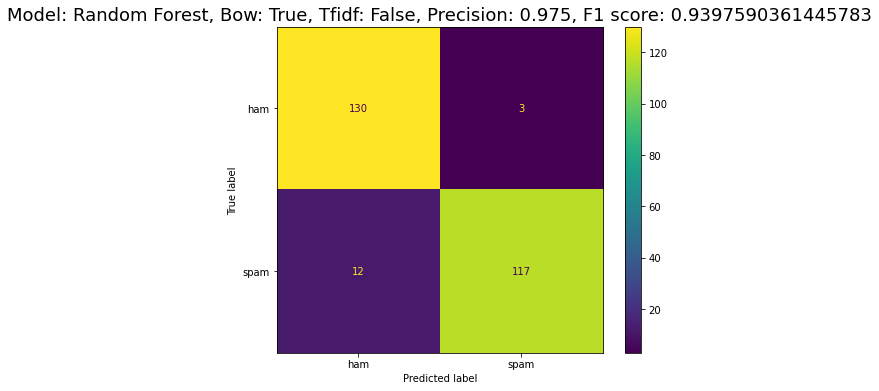

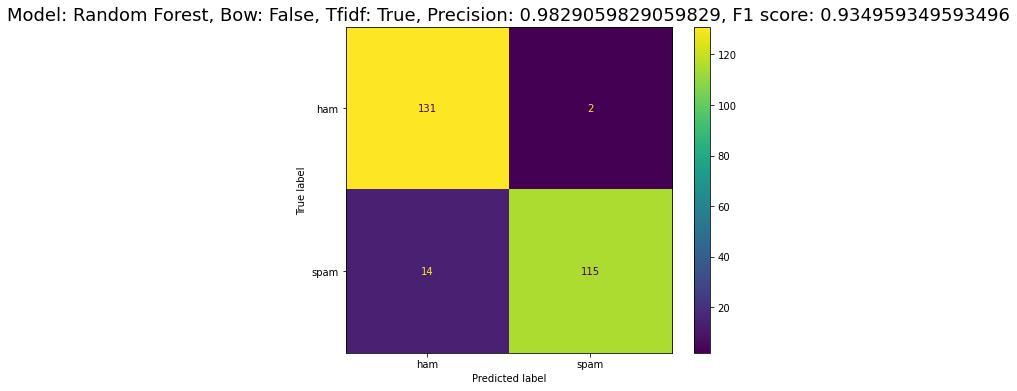

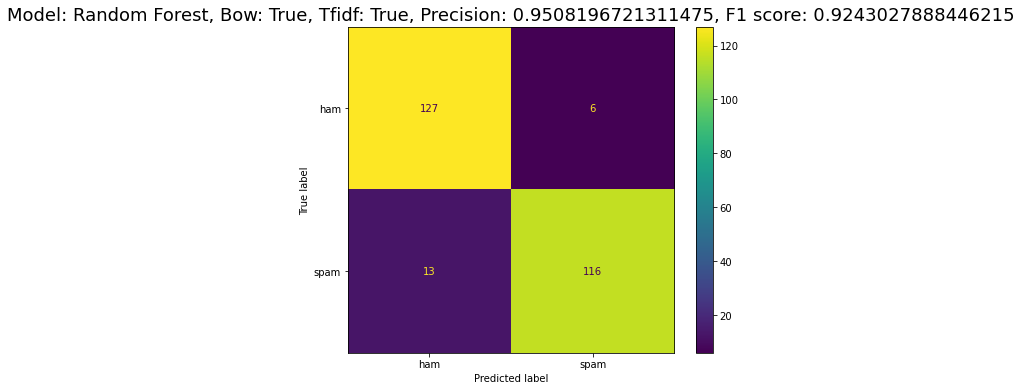

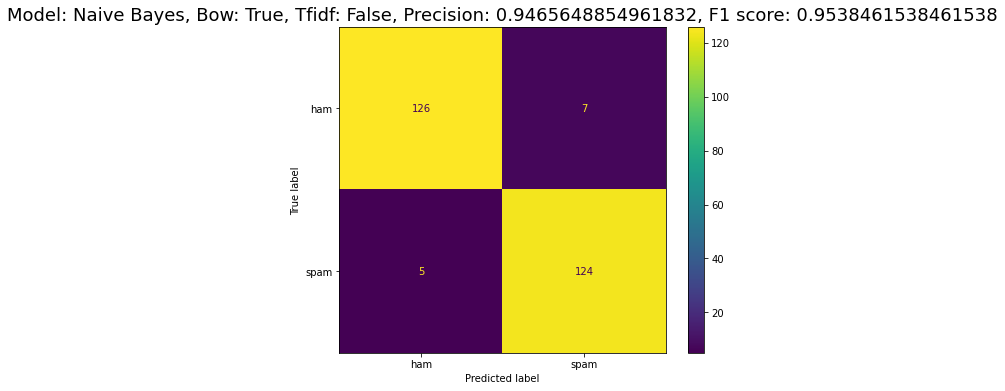

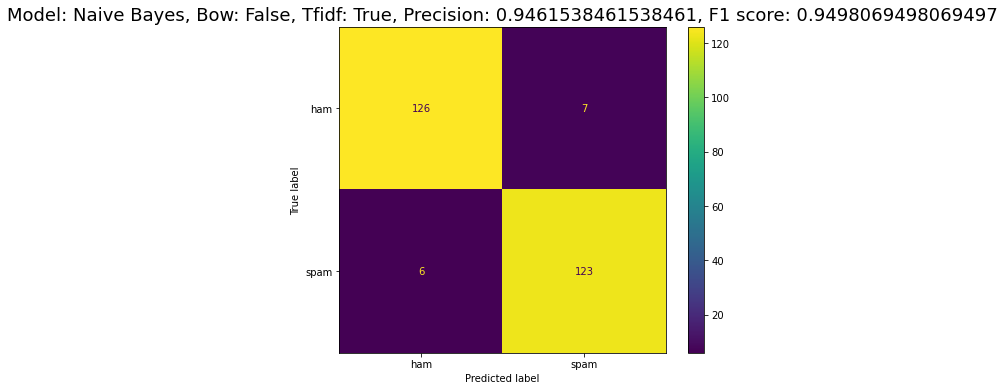

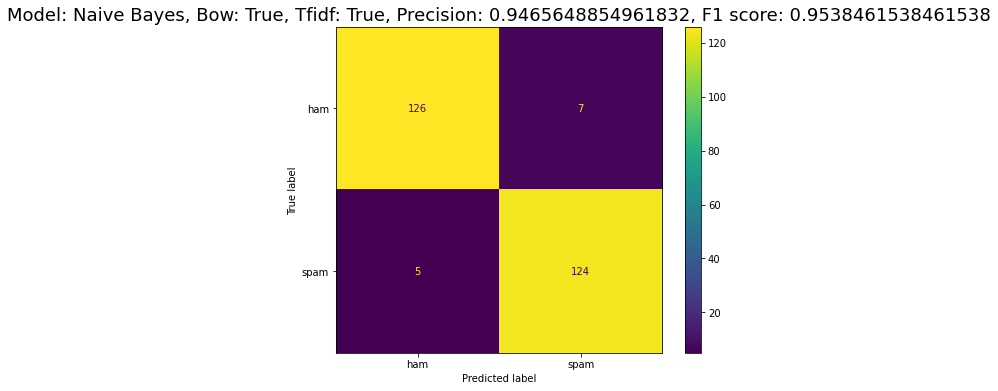

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['sentences'], balanced_df['label'], test_size=0.2, random_state=7)

# Define a function to train and evaluate a Random Forest model
def train_rf(X_train, y_train, X_test, y_test, use_bow, use_tfidf):
    if use_bow:
        vec = CountVectorizer()
    elif use_tfidf:
        vec = TfidfVectorizer()
    else:
        return None

    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    rf = RandomForestClassifier()
    rf.fit(X_train_vec, y_train)

    y_pred = rf.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return ('Random Forest', use_bow, use_tfidf, accuracy, precision, f1, cm)

# Define a function to train and evaluate a Naive Bayes model
def train_nb(X_train, y_train, X_test, y_test, use_bow, use_tfidf):
    if use_bow:
        vec = CountVectorizer()
    elif use_tfidf:
        vec = TfidfVectorizer()
    else:
        return None

    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    nb = MultinomialNB()
    nb.fit(X_train_vec, y_train)

    y_pred = nb.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return ('Naive Bayes', use_bow, use_tfidf, accuracy, precision, f1, cm)

# Define a list of models to train and evaluate
models = [
    train_rf,
    train_nb,
]

results = []
for model in models:
    for use_bow, use_tfidf in text_reps:
        result = model(X_train, y_train, X_test, y_test, use_bow, use_tfidf)
        if result is not None:
            results.append(result)

for result in results:
    fig, ax = plt.subplots(figsize=(8, 6))
    cm = ConfusionMatrixDisplay(result[6], display_labels=['ham', 'spam'])
    cm.plot(ax=ax)
    plt.title(f'Model: {result[0]}, Bow: {result[1]}, Tfidf: {result[2]}, Precision: {result[4]}, F1 score: {result[5]}', fontsize=18)


With the models that performed well before, we will select the best ones that perform in relation to the precision_score, precision measures how well a classifier is able to identify true positive cases, while minimizing the number of false positives. A high precision score means that the classifier is very good at correctly predicting positive cases, and has a low false positive rate.

The best was the Random Forest

In [61]:
# Define a function to train and evaluate a Random Forest model
def train_rf(X_train, y_train, X_test, y_test, use_bow, use_tfidf):
    if use_bow:
        vec = CountVectorizer()
    elif use_tfidf:
        vec = TfidfVectorizer(max_df=0.98)
    else:
        return None

    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    rf = RandomForestClassifier()
    rf.fit(X_train_vec, y_train)

    y_pred = rf.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return (rf, X_test_vec, 'Random Forest', use_bow, use_tfidf, accuracy, precision, f1, cm)

rf, X_test_vec, *_ = train_rf(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, use_bow=False, use_tfidf=True)


Let's see some of the erros in the predicts

In [64]:
error_predictions = pd.DataFrame()
error_predictions['X_test'] = X_test
error_predictions['Prediction'] = rf.predict(X_test_vec)
error_predictions['Real'] = y_test
error_predictions['Error'] = error_predictions['Prediction'] != error_predictions['Real']
error_predictions = error_predictions[error_predictions['Error']==True]

for line, value in error_predictions.iterrows():
    print(value['X_test'], '\nPrediction:', value['Prediction'], '\n')

recpt 1/3. you have ordered a ringtone. your order is being processed... 
Prediction: 0 

do you ever notice that when you are driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac? 
Prediction: 0 

latest news! police station toilet stolen, cops have nothing to go on! 
Prediction: 0 

asked 3mobile if 0870 chatlines inclu in free mins. india cust servs sed yes. l8er got mega bill. 3 dont giv a shit. bailiff due in days. i o å£250 3 want å£800 
Prediction: 0 

can u get 2 phone now? i wanna chat 2 set up meet call me now on 09096102316 u can cum here 2moro luv jane xx callså£1/minmoremobsemspobox45po139wa 
Prediction: 0 

i (career tel) have added u as a contact on indyarocks.com to send free sms. to remove from phonebook - sms no to  &lt;#&gt; 
Prediction: 1 

08714712388 between 10am-7pm cost 10p 
Prediction: 0 

hi its me you are probably having too much fun to get this message but i thought id txt u cos im bored! and james has been farti

Now let's evalute the model with the best params, we will use gridsearch to test some differents params

In [47]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
}

# Create the Random Forest model and vectorizer
vec = TfidfVectorizer(max_df=0.98)
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='precision', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(vec.fit_transform(X_train), y_train)

# Print the best parameter values and the corresponding accuracy score
print('Best parameters:', grid_search.best_params_)
print('Best precision:', grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best precision: 1.0


Finally with the best parms with focus in precision, let's see the results

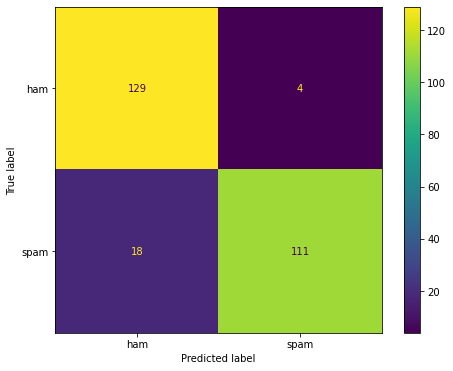

In [65]:
from sklearn.pipeline import Pipeline

# Create the pipeline
pipeline = Pipeline([
    ('vec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
predicted = pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted)

# Plotting the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam'])
cm.plot(ax=ax)

4 ham messages classified as spam, that's a good result, now we can save the model and create our software that will classify e-mails.

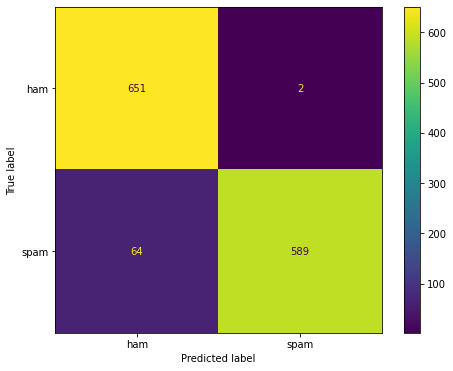

In [66]:
import joblib

# Create the pipeline
pipeline = Pipeline([
    ('vec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200))
])

pipeline.fit(balanced_df['sentences'], balanced_df['label'])

# Make predictions
predicted = pipeline.predict(balanced_df['sentences'])

# Confusion Matrix
cm = confusion_matrix(balanced_df['label'], predicted)

# Plotting the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam'])
cm.plot(ax=ax);

# Save the trained pipeline
joblib.dump(pipeline, 'spam_detection_pipeline.joblib')

# Load the pipeline in the deployment environment
loaded_pipeline = joblib.load('spam_detection_pipeline.joblib')